# Lab 8 - Functions

## Question 1 - Be Sure to Add Documentation to Your Notebook (2 pts)

Start with Markdown cell containing a Markdown title for this assignment, plus an author name and date in list form. Bold the words for author and date, but do not bold your name and today’s date

__Author:__ Zachary Conner

__Date:__ 4/4/2019

## Question 2 - Import Necessary Python Packages (3 pts)

In the questions below, you will be working with `numpy arrays`, and `pandas dataframes`.

You will also be downloading files using `urllib.request`, accessing directories and files on your computer using `os`, and retrieving filenames using `glob.` Last, you will also be creating plots of your data using `matplotlib.pyplot`.

Import all of the necessary Python packages to accomplish these tasks.

In [10]:
# import packages
import numpy as np, pandas as pd, urllib.request, os, glob, matplotlib.pyplot as plt

# print message to show import of packages sucessful
print('Import of packages sucessful')

Import of packages sucessful


## Question 3 - Set current working directory (5pts)
use os.chdir() to set current working directory.
use os.getcwd() to check current working directory

In [2]:
# set the current working directory
os.chdir('C:\\Users\zconner\Documents\GTECH785')

# display the current working directory
os.getcwd()

'C:\\Users\\zconner\\Documents\\GTECH785'

## Question 4 - Download FLX*.csv files into /data subdirectory (10pts)

Use `urllib.request` to download the flux data for Harvard Forest and Hyytiala, Finland to your data directory. The location of the data is 
- http://www.geography.hunter.cuny.edu/~wenge/GTECH385-785/FLX_FI-Hyy_FLUXNET2015_SUBSET_YY_1996-2014_1-3.csv
- http://www.geography.hunter.cuny.edu/~wenge/GTECH385-785/FLX_US-Ha1_FLUXNET2015_SUBSET_YY_1991-2012_1-3.csv

* More information about the Harvard Forest site can be found<a href="http://sites.fluxdata.org/US-Ha1/" target="_blank"> here 
* More information about the Hyytiala site can be found<a href="http://sites.fluxdata.org/FI-Hyy/" target="_blank"> here

In [3]:
# use urllib to download files
urllib.request.urlretrieve(
    url ='http://www.geography.hunter.cuny.edu/~wenge/GTECH385-785/FLX_FI-Hyy_FLUXNET2015_SUBSET_YY_1996-2014_1-3.csv',                  
    filename = "FLUX_HYY.csv"
)

urllib.request.urlretrieve(
    url ='http://www.geography.hunter.cuny.edu/~wenge/GTECH385-785/FLX_US-Ha1_FLUXNET2015_SUBSET_YY_1991-2012_1-3.csv',                  
    filename = "FLUX_HA.csv"
)

# print message that data was downloads were sucessful
print("datasets downloaded sucessful")

datasets downloaded sucessful


## Question 5: Use Glob To Create Lists of Filenames (10 pts)
1. change working directory to data and  create a list of all files containting keywork "FLX" in your working directory 
2. Print these lists of filenames.

In [4]:
# use glob, change working directory to data and create a list of all files containing keyword "FLUX" on your working directory
# print this list of file names

# set directory
os.chdir('C:\\Users\zconner\Documents\GTECH785')

# create a list of with glob using the keywords "FLUX"
fluxList = glob.glob('*FLUX*')

# print the list of files containing the keywords "FLUX"
print(fluxList)

['FLUX_HA.csv', 'FLUX_HYY.csv']


# Use a function to do Questions 6-10

## Question 6: Import CSV Files Into Pandas Dataframes (10 pts)

1. Import each csv file into a new pandas dataframe.
2. Print your pandas dataframes. Notice the structures of your csv pandas dataframes.

## Question 7 -  Create the column lists of dataframes (10pts)

## Question 8 - Create new columnlists including the following columns  (10pts)

* NEE_VUT_REF, but not NEE_VUT_REF_QC  not  NEE_VUT_REF_RANDUNC
* GPP_NT_VUT_REF
* RECO_NT_VUT_RE

## Question 9: Summarize the statistics of the new columnlist  (10 pts)

## Question 10:  Plot time series of GPP, NEE and RE for for both sites  (15 pts)
1. Plot the annual GPP, RE and NEE for Harvard Forest in three subplots, their units are  gC m-2 y-1),   

FLUX_HYY.csv
   TIMESTAMP   TA_F   TA_F_QC  SW_IN_F  SW_IN_F_QC  LW_IN_F  LW_IN_F_QC  \
0       1996  3.393  0.751935   91.162    0.751992  292.788         0.0   
1       1997  4.275  0.998573  108.535    0.996062  293.855         0.0   
2       1998  3.433  0.991781  108.485    0.990811  296.700         0.0   
3       1999  4.333  0.999372  106.014    0.990011  298.992         0.0   
4       2000  5.308  0.992771  100.331    0.936305  302.101         0.0   

   VPD_F  VPD_F_QC    PA_F    ...      RECO_DT_VUT_REF  RECO_DT_VUT_25  \
0  2.497  0.751765  99.615    ...             1079.060        1088.910   
1  3.183  0.998459  99.189    ...              776.113         776.113   
2  2.095  0.738584  99.102    ...              864.777         809.100   
3  2.911  0.999372  99.118    ...              913.381         906.848   
4  2.387  0.982923  99.076    ...             1129.650        1121.130   

   RECO_DT_VUT_50  RECO_DT_VUT_75  GPP_DT_VUT_REF  GPP_DT_VUT_25  \
0        1116.490      

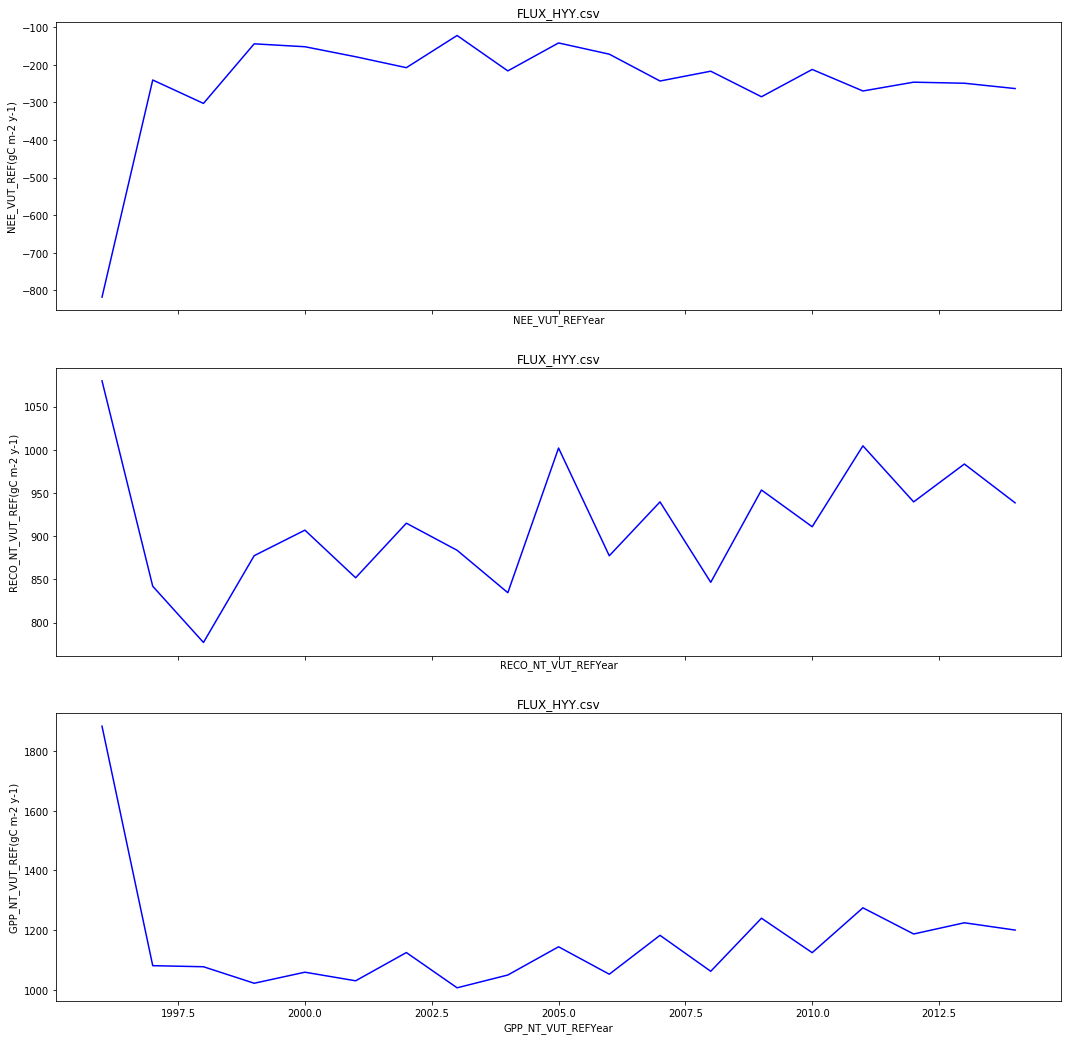

In [36]:
def Flux(site):
   
    # import flux data into pandas dataframes and print the head
    print(site)
    flux = pd.read_csv(site)
    print(flux.head())
    
    # create column list of dataframe
    columnlist = list(flux)
    print(columnlist)
    
    # create a new column list for NEE, GPP, RE
    newcolumnlist = []
    for p in columnlist:
        if "NEE_VUT_REF" in p and "QC" not in p and "RANDUNC" not in p:
            newcolumnlist += [p]
        if "GPP_NT_VUT_REF" in p:
            newcolumnlist += [p]
        if "RECO_NT_VUT_REF" in p:
            newcolumnlist += [p]
    print(newcolumnlist)
    
    # display summary statistics
    print(flux[newcolumnlist].describe())
    
     # set plot size
    plt.rcParams["figure.figsize"] = (18,18)
    
    # set up the plot
    fig, axs = plt.subplots( 3, 1, sharex = True)
    
    # plot GPP, RE and NEE
    m = 0
    for newcolumn in newcolumnlist:
        print(newcolumn)
        axs[m].plot(flux["TIMESTAMP"],flux[newcolumn],color = "red")
        
    # set plot title
        axs[m].set(title = site)
        
    # add labels to the axes
        axs[m].set(ylabel=newcolumn+"(gC m-2 y-1)")
        axs[m].set(xlabel=newcolumn+"Year")
        m += 1
    return
    
Flux('FLUX_HYY.csv')


FLUX_HA.csv
   TIMESTAMP   TA_F   TA_F_QC  SW_IN_F  SW_IN_F_QC  LW_IN_F  LW_IN_F_QC  \
0       1991  8.014  0.180594  137.546    0.525457  265.084         0.0   
1       1992  8.387  0.896403  140.778    0.889458  263.162         0.0   
2       1993  7.516  0.584018  149.267    0.891667  265.649         0.0   
3       1994  8.552  0.796119  150.096    0.936872  261.219         0.0   
4       1995  7.647  0.949315  153.325    0.943950  254.515         0.0   

   VPD_F  VPD_F_QC    PA_F    ...      RECO_DT_VUT_REF  RECO_DT_VUT_25  \
0  3.344  0.179795  98.534    ...              666.918         672.676   
1  2.746  0.888775  98.489    ...             1079.230        1066.250   
2  3.351  0.502283  98.717    ...             1278.270        1375.350   
3  3.245  0.793721  98.209    ...             1128.490        1132.110   
4  3.077  0.947945  98.434    ...              996.808        1015.930   

   RECO_DT_VUT_50  RECO_DT_VUT_75  GPP_DT_VUT_REF  GPP_DT_VUT_25  \
0         682.666       

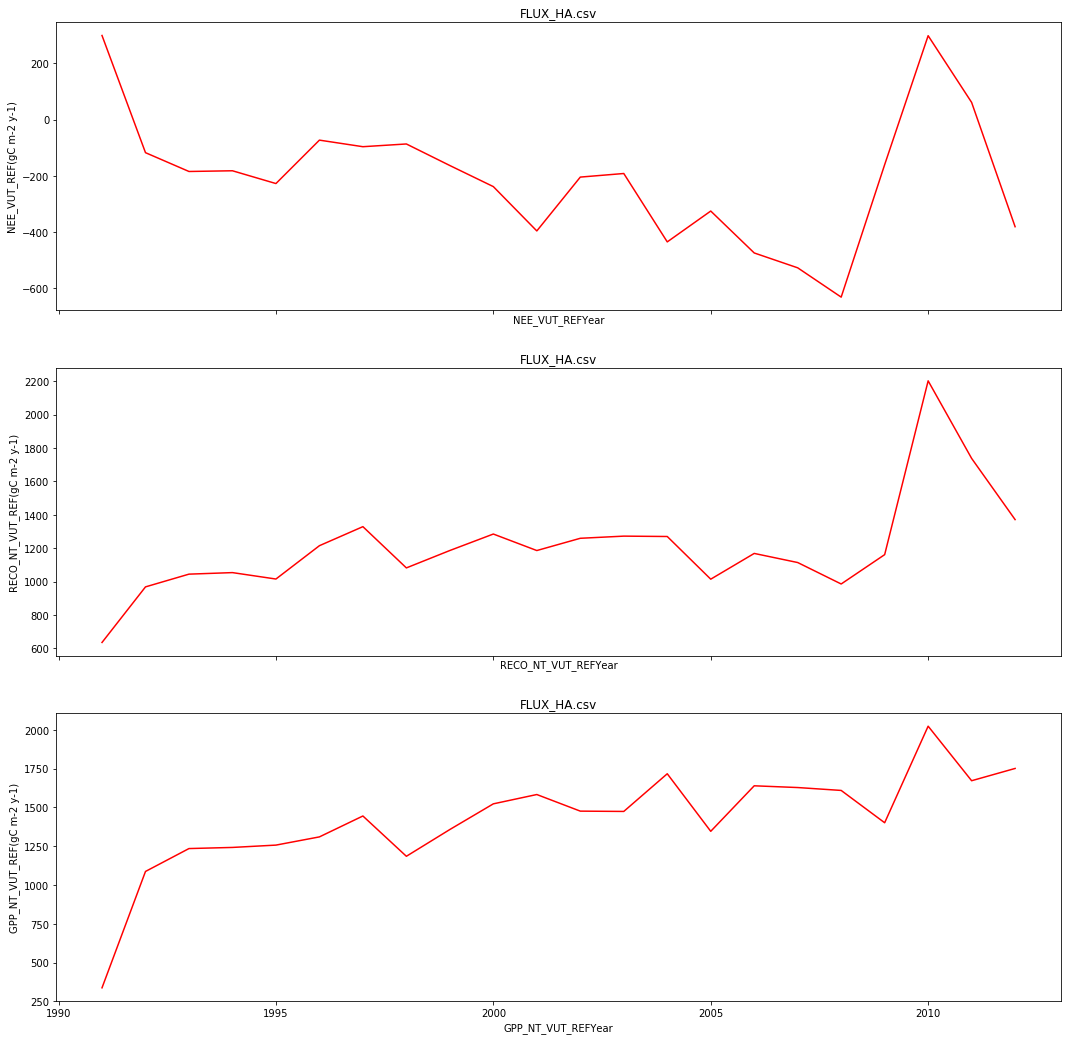

In [40]:
def Flux(site):
   
    # import flux data into pandas dataframes and print the head
    print(site)
    flux = pd.read_csv(site)
    print(flux.head())
    
    # create column list of dataframe
    columnlist = list(flux)
    print(columnlist)
    
    # create a new column list for NEE, GPP, RE
    newcolumnlist = []
    for p in columnlist:
        if "NEE_VUT_REF" in p and "QC" not in p and "RANDUNC" not in p:
            newcolumnlist += [p]
        if "GPP_NT_VUT_REF" in p:
            newcolumnlist += [p]
        if "RECO_NT_VUT_REF" in p:
            newcolumnlist += [p]
    print(newcolumnlist)
    
    # display summary statistics
    print(flux[newcolumnlist].describe())
    
     # set plot size
    plt.rcParams["figure.figsize"] = (18,18)
    
    # set up the plot
    fig, axs = plt.subplots( 3, 1, sharex = True)
    
    # plot GPP, RE and NEE
    m = 0
    for newcolumn in newcolumnlist:
        print(newcolumn)
        axs[m].plot(flux["TIMESTAMP"],flux[newcolumn],color = "red")
        
    # set plot title
        axs[m].set(title = site)
        
    # add labels to the axes
        axs[m].set(ylabel=newcolumn+"(gC m-2 y-1)")
        axs[m].set(xlabel=newcolumn+"Year")
        m += 1
    return 
    
Flux('FLUX_HA.csv')


## Question 11: Discuss Plots (15 pts)

1. Comparing to Lab7, how are the plots using a loop and a function different?   

Writing a function makes the code much more consise. Once you have your function defined, as we have above, you simply call the function with one line of code and the entire lab 7 assignment can be done with one line of code. In a sense, all we added into this lab was the definition function and called the defintion. The body of the function is essentially the loop from lab 7. 